In [6]:
import pandas as pd
import numpy as np

In [8]:
carpeta = r'C:/MODELO-CRISIS-ASMATICA/'
archivo = 'dataset_asma_balanceado.csv'
data_set_im=pd.read_csv(carpeta+archivo,sep=',')
data_set_im.head()

,BMI,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,Asma
0,15.8,0,0,1,0,0
1,22.8,1,0,0,1,0
2,18.4,1,1,1,0,0
3,38.5,1,0,1,1,0
4,19.3,1,1,1,0,0


In [75]:
data_set_im.loc[
    (data_set_im['Wheezing'] == 1) &
    (data_set_im['ShortnessOfBreath'] == 1) &
    (data_set_im['ChestTightness'] == 1) &
    (data_set_im['Coughing'] == 1),
    'Asma'
] = 1

data_set_im.loc[
    (data_set_im['BMI'] < 25 ) &
    (data_set_im['Wheezing'] == 0) &
    (data_set_im['ShortnessOfBreath'] == 1) &
    (data_set_im['ChestTightness'] == 0) &
    (data_set_im['Coughing'] == 0),
    'Asma'
] = 0

data_set_im.loc[
    (data_set_im['BMI'] < 25 ) &
    (data_set_im['Wheezing'] == 0) &
    (data_set_im['ShortnessOfBreath'] == 0) &
    (data_set_im['ChestTightness'] == 0) &
    (data_set_im['Coughing'] == 1),
    'Asma'
] = 0

data_set_im.loc[
    (data_set_im['Wheezing'] == 0) &
    (data_set_im['ShortnessOfBreath'] == 0) &
    (data_set_im['ChestTightness'] == 1) &
    (data_set_im['Coughing'] == 0) ,
    'Asma'
] = 0

data_set_im.loc[
    (data_set_im['Wheezing'] == 1) &
    (data_set_im['ShortnessOfBreath'] == 0) &
    (data_set_im['ChestTightness'] == 0) &
    (data_set_im['Coughing'] == 0) ,
    'Asma'
] = 0

data_set_im.loc[
    (data_set_im['Wheezing'] == 1) &
    (data_set_im['ShortnessOfBreath'] == 0) &
    (data_set_im['ChestTightness'] == 1) &
    (data_set_im['Coughing'] == 0) ,
    'Asma'
] = 1

data_set_im.loc[
    (data_set_im['Wheezing'] == 0) &
    (data_set_im['ShortnessOfBreath'] == 0) &
    (data_set_im['ChestTightness'] == 0) &
    (data_set_im['Coughing'] == 1) ,
    'Asma'
] = 0

data_set_im.loc[
    (data_set_im['Wheezing'] == 0) &
    (data_set_im['ShortnessOfBreath'] == 1) &
    (data_set_im['ChestTightness'] == 0) &
    (data_set_im['Coughing'] == 0) ,
    'Asma'
] = 0
data_set_im.loc[
    (data_set_im['Wheezing'] == 0) &
    (data_set_im['ShortnessOfBreath'] == 1) &
    (data_set_im['ChestTightness'] == 1) &
    (data_set_im['Coughing'] == 1) ,
    'Asma'
] = 1
data_set_im.loc[
    (data_set_im['Wheezing'] == 1) &
    (data_set_im['ShortnessOfBreath'] == 1) &
    (data_set_im['ChestTightness'] == 1) &
    (data_set_im['Coughing'] == 0) ,
    'Asma'
] = 1

PENDIENTE

In [39]:

print(data_set_im[
    (data_set_im['Wheezing'] == 1) &
    (data_set_im['ShortnessOfBreath'] == 0) &
    (data_set_im['ChestTightness'] == 0) &
    (data_set_im['Coughing'] == 0) &
    (data_set_im['Asma'] == 1)
    ].head(20))

Empty DataFrame
Columns: [BMI, Wheezing, ShortnessOfBreath, ChestTightness, Coughing, Asma]
Index: []


In [74]:
print(data_set_im[
    (data_set_im['Wheezing'] == 1) &
    (data_set_im['ShortnessOfBreath'] == 0) &
    (data_set_im['ChestTightness'] == 1) &
    (data_set_im['Coughing'] == 0) &
    (data_set_im['Asma'] == 1)
    ].head(20))

      BMI  Wheezing  ShortnessOfBreath  ChestTightness  Coughing  Asma
5    21.8         1                  0               1         0     1
24   29.7         1                  0               1         0     1
26   22.4         1                  0               1         0     1
46   17.3         1                  0               1         0     1
58   27.2         1                  0               1         0     1
67   17.9         1                  0               1         0     1
101  18.2         1                  0               1         0     1
102  18.6         1                  0               1         0     1
132  32.3         1                  0               1         0     1
135  20.8         1                  0               1         0     1
136  37.1         1                  0               1         0     1
178  33.2         1                  0               1         0     1
189  26.4         1                  0               1         0     1
203  2

In [76]:
# Exportación del dataset limpio
data_set_im.to_csv("dataset_clean_asma_dos.csv",sep=",")
print("Se exportó el dataset")

Se exportó el dataset


***ENTRENAMIENTO MODELO MACHINE LEARNING***

In [77]:
# LIBRERIAS PARA VISUALIZAR LA INFORMACIÓN
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
#Libreria para medir el tiempo de entrenamiento de los modelos de ML
import time
#Libreria para la distribucion de los datos balanceados en datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
##LIBRERIAS PARA IMPORTAR LOS ALGORITMOS
#libreria para utilizar el Algoritmo Logistical Regresion
from sklearn.linear_model import LogisticRegression
#libreria para utilizar el Algoritmo Random Forest
from sklearn.ensemble import RandomForestClassifier
#libreria para utilizar el Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier
#libreria para utilizar el Algoritmo Decision Tree
from sklearn.tree import DecisionTreeClassifier
#libreria para utilizar el Algoritmo XGBoost
from xgboost import XGBClassifier
#libreria para utilizar el Algoritmo AdaBoost
from sklearn.ensemble import AdaBoostClassifier
#Libreria para utilizar el Algoritmo  Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Libreria para utilizar el Algoritmo  Support Vector Regression
from sklearn.svm import SVR

In [79]:
# LIBRERÍAS QUE MEDIRAN EL RENDIMIENTO DE LOS MODELOS ML
#ACURRACY: EXACTITUD
#PRECISION: PRECISION
#RECALL: SENSIBILIDAD
#F1 SCORE: PUNTUACION F1
#AUC ROC
#CONFUSION_MATRIX: CALCULAR ESPECIFICIDAD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

In [80]:
# CARGA DEL DATASET LIMPIO
archivo_dataset_limpio = "dataset_clean_asma_dos.csv"
data_set_im=pd.read_csv(carpeta+archivo_dataset_limpio,sep=",")
data_set_im.head()

,Unnamed: 0,BMI,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,Asma
0,0,15.8,0,0,1,0,0
1,1,22.8,1,0,0,1,0
2,2,18.4,1,1,1,0,1
3,3,38.5,1,0,1,1,0
4,4,19.3,1,1,1,0,1


In [81]:
# Seleccionamos columnas necesarias
data_set_im = data_set_im[["BMI","Wheezing","ShortnessOfBreath","ChestTightness","Coughing","Asma"]]
data_set_im.head()

,BMI,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,Asma
0,15.8,0,0,1,0,0
1,22.8,1,0,0,1,0
2,18.4,1,1,1,0,1
3,38.5,1,0,1,1,0
4,19.3,1,1,1,0,1


In [82]:
# print(glaucoma_dataset.columns) # Columnas del dataset
# x_risk_factors = glaucoma_dataset[['BMI', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'Asma']]
x_risk_factors = data_set_im[['BMI', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing']]
y_target_asma = data_set_im["Asma"]

RANDOM FORETS

In [83]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
rf_dataTrain,rf_dataTemp,rf_targetTrain,rf_targetTemp=train_test_split(x_risk_factors,y_target_asma,test_size=0.3,random_state=42)
rf_dataVal, rf_dataPrueba,rf_targetVal, rf_targetPrueba = train_test_split(rf_dataTemp,rf_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO RF
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
modelRF=RandomForestClassifier(random_state=42,criterion='gini',max_features='sqrt',n_estimators=100)
modelRF.fit(rf_dataTrain,rf_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")

TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.3339509963989258


**METRICAS DE ENTRENAMIENTO RF:
{'Accuracy': 0.9933858267716535, 'Precision': 0.9870609981515711, 'Recall': 1.0, 'F1 score': 0.9934883720930232, 'Specificity': np.float64(0.9866497139224412)}
**METRICAS DE VALIDACION RF:
{'Accuracy': 0.9838235294117647, 'Precision': 0.9660493827160493, 'Recall': 1.0, 'F1 score': 0.9827315541601256, 'Specificity': np.float64(0.9700272479564033)}
**METRICAS DE PRUEBAS RF:
{'Accuracy': 0.9838472834067548, 'Precision': 0.9684813753581661, 'Recall': 1.0, 'F1 score': 0.9839883551673945, 'Specificity': np.float64(0.967930029154519)}
VALIDACION CRUZADA ESTIMACION: [0.98897638 0.96850394 0.97637795 0.96220472 0.97322835]
MEDIA VALIDACION CRUZADA ESTIMACION: 0.9738582677165354


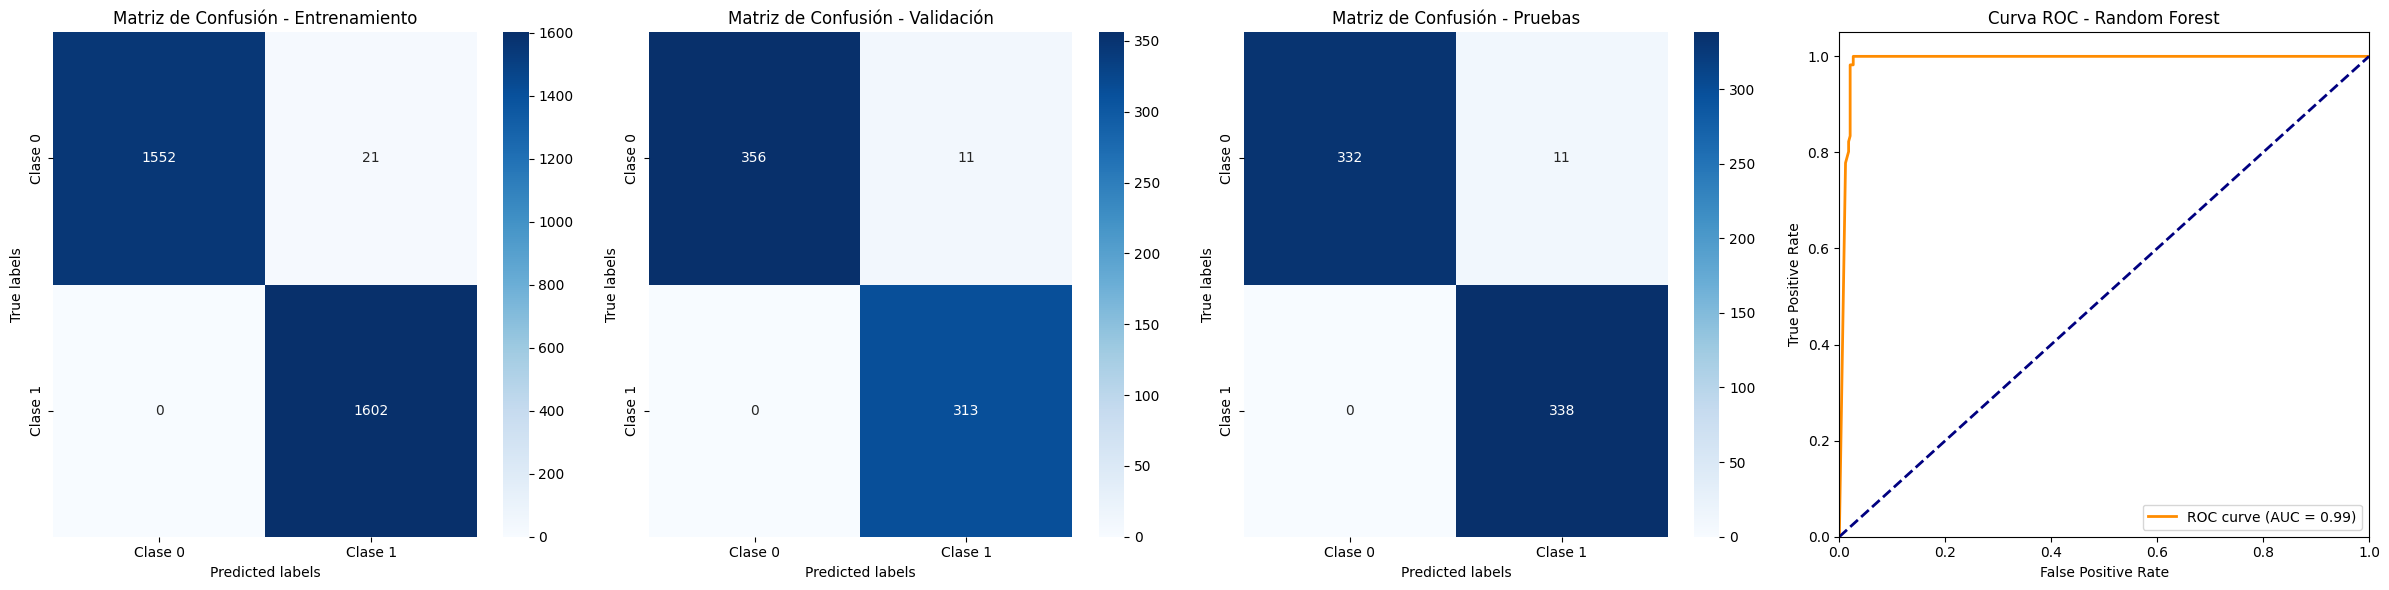

In [84]:
# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_nm(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# EVALUACIÓN DEL MODELO DE ML RANDOM FOREST
def metrics_model_rf(x, y):
    predictions = modelRF.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
rf_train_results, train_mat_conf_rf = metrics_model_rf(rf_dataTrain, rf_targetTrain)
rf_val_results, val_mat_conf_rf = metrics_model_rf(rf_dataVal, rf_targetVal)
rf_test_results, test_mat_conf_rf = metrics_model_rf(rf_dataPrueba, rf_targetPrueba)

print(f'**METRICAS DE ENTRENAMIENTO RF:\n{rf_train_results}')
print(f'**METRICAS DE VALIDACION RF:\n{rf_val_results}')
print(f'**METRICAS DE PRUEBAS RF:\n{rf_test_results}')
print("===================================================================")
# Mostrar los resultados de la validación cruzada
print(f"VALIDACION CRUZADA ESTIMACION: {cross_val_score(modelRF, rf_dataTrain, rf_targetTrain, cv=5)}")
print(f"MEDIA VALIDACION CRUZADA ESTIMACION: {cross_val_score(modelRF, rf_dataTrain, rf_targetTrain, cv=5).mean()}")
# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura con subgráficos en una fila
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Graficar las matrices de confusión en cada subgráfico
plot_confusion_matrix_nm(axs[0], train_mat_conf_rf, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_nm(axs[1], val_mat_conf_rf, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_nm(axs[2], test_mat_conf_rf, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
rf_probs = modelRF.predict_proba(rf_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(rf_targetPrueba, rf_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC en el cuarto subgráfico
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - Random Forest')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

GUARDAR EL MODELO PREDICTIVO EN .PKL

In [85]:
import pickle

pickle.dump(modelRF, open('asma_model_dos.pkl', 'wb'))
print('modelo exportado correctamente')

modelo exportado correctamente
